# Introduction to Machine Learning 1

See https://learning.anaconda.cloud/getting-started-with-ai-ml

Cover major supervised machine learning algorithms which use labelled data to make predicitons:

- linear regression
- Logistic regression
- Naive Bayes
- Decision trees / random forests
- Neural networks

Using `scikit-learn` for implementation

##  Linear Regression

The most commonly used supervised machine learning algorithm. 

In this module, you'll learn how to: 

- Fit a line to data
- Measure loss with residuals and sum of squares
- Use scikit-learn to fit a linear regression
- Evaluate a linear regression using R2 and train-test splits 

### Advantages

- simple to understand and interpret 
- doesn't over-fit

### When is Linear Regression suitable?

1. variables are continuous, not binary or categorical (use logistic regression for the latter)
2. input variables follow a Gaussian (bell curve) distribution
3. input variables are relevant to the output variables and _not_ highly correlated with each other (collinearity)

### Objectives

1. fit a line to data
2. measure loss with residuals and sum of sqaures
3. use `scikit-learn`` for linear regression
4. evaluate LR with R2 and train/test splits

### Simple Linear Regression

ML often splits into two tasks - **regression** (predict quantity) and **classification** (predict a category)

E.g $y = mx+b$

Challenge is to define `m` and `b` for "best fit"

### Multiple linear regression

With multiple independent variables

e.g. $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$

$\epsilon $ is error due to noise

Multiple variables can get complex, important to use tools to help select only input variables correlated wit hthe output variables (see course slide)

e.g.:

- Pearson correlation and $R^2$
- adjusted $R^2$
- Akakike Information Criterion
- Ridge and lasso regression

#furtherlearning



### Residuals

The differences between the data points and the regressions.

Aim to minimise total residuals using a loss function.

**Sum of squares**


Declare training data

In [117]:
x_data = [1.0, 2.0, 3.0]
y_actuals = [1.2, 1.25, 2.0]

Declare slope and intercept coefficients

In [118]:
m = .368421
b = .587719

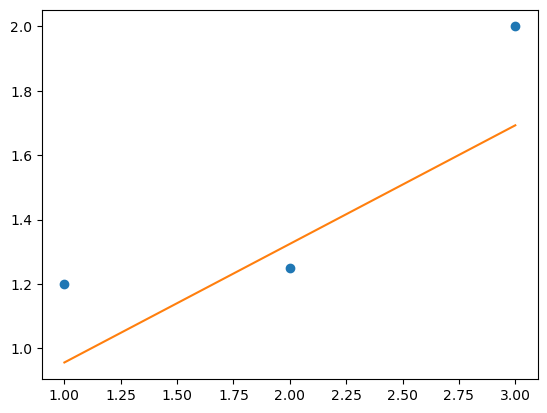

In [119]:
# plot scatter plot and line
import matplotlib.pyplot as plt

plt.plot(x_data, y_actuals, 'o')
plt.plot(x_data, [m*x+b for x in x_data])
plt.show()

In [120]:
# calculate predicted y-values

y_predicts = [m*x + b for x in x_data]

In [121]:
# print sum of squares

sum_of_squares = 0

for (y_actual, y_predict) in zip(y_actuals, y_predicts):
    residual = y_actual - y_predict
    sum_of_squares += residual ** 2
    
print ("SUM OF SQUARES: ", sum_of_squares)

SUM OF SQUARES:  0.15928709464500013


### Exercise 1a

In [122]:
import pandas as pd

# import dataframe containing two columns of data
df = pd.read_csv('https://bit.ly/3pBKSuN')


# declare line with slope and intercept
m = 1.86305
b = -0.299037

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y_actuals = df.values[:, -1]

# calculate y_predictions 
Y_predicts = m*X + b

sum_of_squares = 0

for (y_actual, y_predict) in zip(Y_actuals, Y_predicts): 
    residual = y_actual - y_predict 
    sum_of_squares += residual ** 2

print("SUM OF SQUARES: ", sum_of_squares)

SUM OF SQUARES:  [4568.04002146]


### Finding the coefficients  

In examples above the coefficients were supplied. In real life we need to find them

Various techniques for future learning such as gradient descent, matrix decomposition, hill climbing etc.

In [course](https://learning.anaconda.cloud/getting-started-with-ai-ml/20535) however use `scikit-learn` to find them.

In [123]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [124]:
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
df

,x,y
0,1,5
1,2,10
2,3,10
3,4,15
4,5,14
5,6,15
6,7,19
7,8,18
8,9,25
9,10,23


In [125]:
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]


Using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from `scikit-learn` we can fit a linear regression to these data points:

In [126]:
# Fit the LinearRegression model and extract the two coefficients.
# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

m = [1.93939394]
b = [4.73333333]


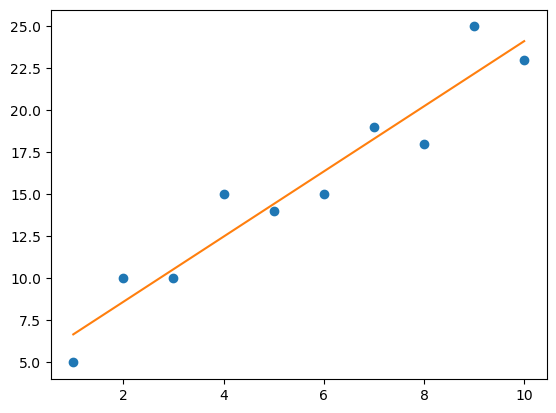

In [127]:
# show in chart
# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()

## Overfitting and Model Evaluation

When ML model works well with training data but fails to predict correctly with  new data.

Linear regression tends to show low variance and hugh bias, so less likely to be overfitted.

### Train/Test Splits

Common technique to mitigate overfitting is the use of train/test splits. Training data is used to fit the model, then test data is used to test it with previously-unseen data, if necessary the model can then be tweaked.

### Evaluating the model with $R^2$

$R^2$ (the **coefficient of determination**) ratios the average y-value to the average of the residuals. 

It measures how well the independent variables explain a dependent variable, with **0.0** meaning no connection and **1.0** meaning a perfect explanation.



### Linear regression Train/Test Split

In [128]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [129]:
# Load the data
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")
df

,x,y
0,99.504842,159.464415
1,44.662766,50.508179
2,66.631337,91.677570
3,74.663878,121.276874
4,57.554853,77.660511
...,...,...
375,187.856720,314.745930
376,54.705039,74.161177
377,137.863407,222.073346
378,128.667926,226.704162


In [130]:
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

In [131]:
# Separate training and testing data to evaluate performance and reduce overfitting
# This leaves a third of the data out for testing
# Set a random seed just to make the randomly selected split consistent
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0/3.0, random_state=10)

In [132]:
# fit the model to the Train data set
model = LinearRegression()
model.fit(X_train, Y_train)

# test the model on the Test data set
result = model.score(X_test, Y_test)
print("R^2: %.3f" % result)

R^2: 0.994


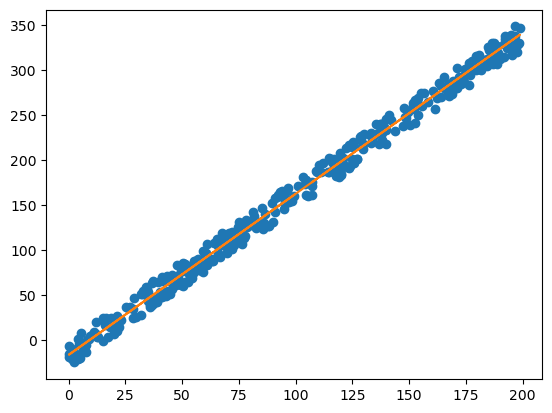

In [133]:
import matplotlib.pyplot as plt

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, model.coef_.flatten()*X+model.intercept_.flatten()) # line
plt.show()

### Exercise 1b

R^2: 0.182


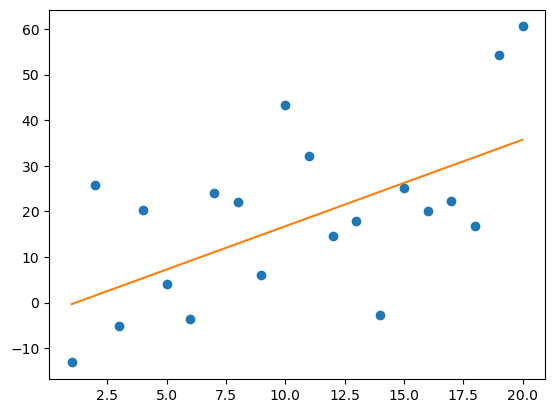

In [137]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('https://bit.ly/3pBKSuN', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data to evaluate performance and reduce overfitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0/3.0, random_state=10)

# Train the model 
model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)

# Print the Score 
print("R^2: %.3f" % result)

import matplotlib.pyplot as plt

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, model.coef_.flatten()*X+model.intercept_.flatten()) # line
plt.show()